In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import shutil

In [10]:
import os, zipfile, tensorflow as tf, shutil

# URL oficial del dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_zip = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url)

# Extraer manualmente en una ruta segura
extract_path = os.path.join("/content", "cats_and_dogs_filtered")
with zipfile.ZipFile(dataset_zip, "r") as zip_ref:
    zip_ref.extractall("/content")

PATH = extract_path  # ruta base segura
print("Ruta base:", PATH)
print("Subcarpetas:", os.listdir(PATH))  # debe mostrar ['train', 'validation']

# Directorios principales
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Crear conjunto de prueba (50 imágenes)
test_dir = os.path.join(PATH, 'test')
os.makedirs(test_dir, exist_ok=True)

for i, fname in enumerate(os.listdir(validation_cats_dir)[:25]):
    shutil.copy(os.path.join(validation_cats_dir, fname), os.path.join(test_dir, f'cat_{i}.jpg'))
for i, fname in enumerate(os.listdir(validation_dogs_dir)[:25]):
    shutil.copy(os.path.join(validation_dogs_dir, fname), os.path.join(test_dir, f'dog_{i}.jpg'))

print("Imágenes de prueba creadas:", len(os.listdir(test_dir)))

# Parámetros base
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 32


Ruta base: /content/cats_and_dogs_filtered
Subcarpetas: ['vectorize.py', 'train', 'validation']
Imágenes de prueba creadas: 50


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador con aumento de datos para entrenamiento
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generador solo con normalización para validación
validation_image_generator = ImageDataGenerator(rescale=1./255)

# Generadores de datos
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


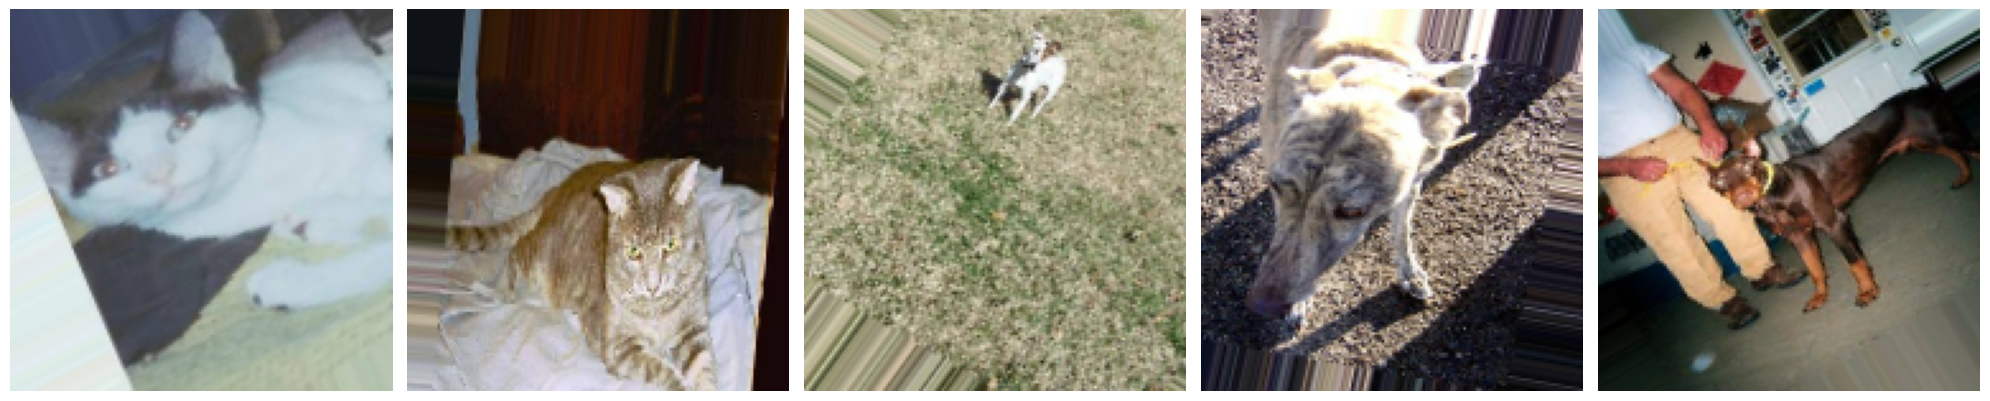

In [12]:
import matplotlib.pyplot as plt

sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])


In [13]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [15]:
EPOCHS = 15

history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 288ms/step - accuracy: 0.4958 - loss: 0.8375 - val_accuracy: 0.5010 - val_loss: 0.6926
Epoch 2/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5000 - loss: 0.6922

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5000 - loss: 0.6922 - val_accuracy: 0.4970 - val_loss: 0.6929
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 262ms/step - accuracy: 0.5643 - loss: 0.6913 - val_accuracy: 0.6119 - val_loss: 0.6793
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5938 - loss: 0.6684 - val_accuracy: 0.6119 - val_loss: 0.6784
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 227ms/step - accuracy: 0.6085 - loss: 0.6709 - val_accuracy: 0.6240 - val_loss: 0.6408
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6875 - loss: 0.6393 - val_accuracy: 0.6290 - val_loss: 0.6375
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 247ms/step - accuracy: 0.5947 - loss: 0.6592 - val_accuracy: 0.5917 - val_loss: 0.6551
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6250 - loss: 0.6492 - val_accuracy: 0.5988 - val_loss: 0.6500
Epoch 9/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - accuracy: 0.6621 - loss: 0.6280 - val_accuracy: 0.6240 - val_

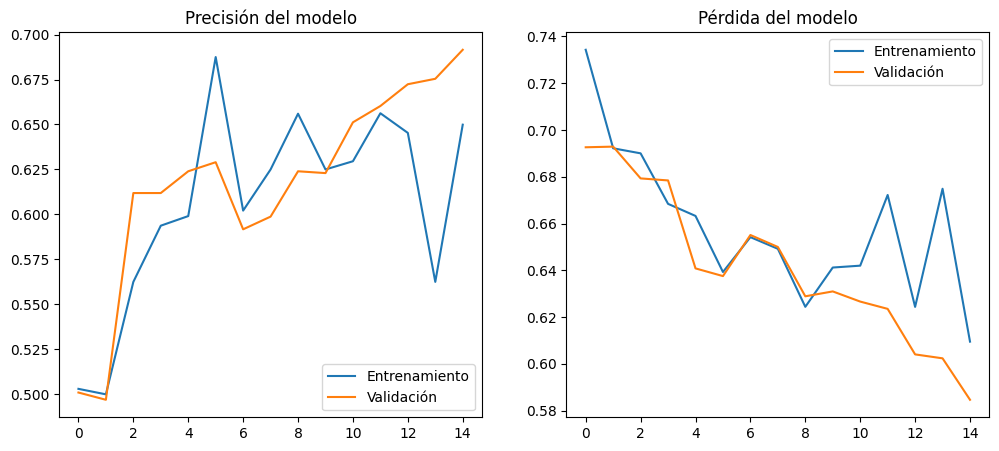

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.legend(loc='lower right')
plt.title('Precisión del modelo')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.legend(loc='upper right')
plt.title('Pérdida del modelo')
plt.show()


In [17]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(
    PATH,  # raíz con subcarpeta test
    classes=['test'],  # apuntar a /test
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

predictions = model.predict(test_data_gen)
print("Predicciones generadas:", len(predictions))


Found 50 images belonging to 1 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicciones generadas: 50


/tmp/ipython-input-2105644353.py:16: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


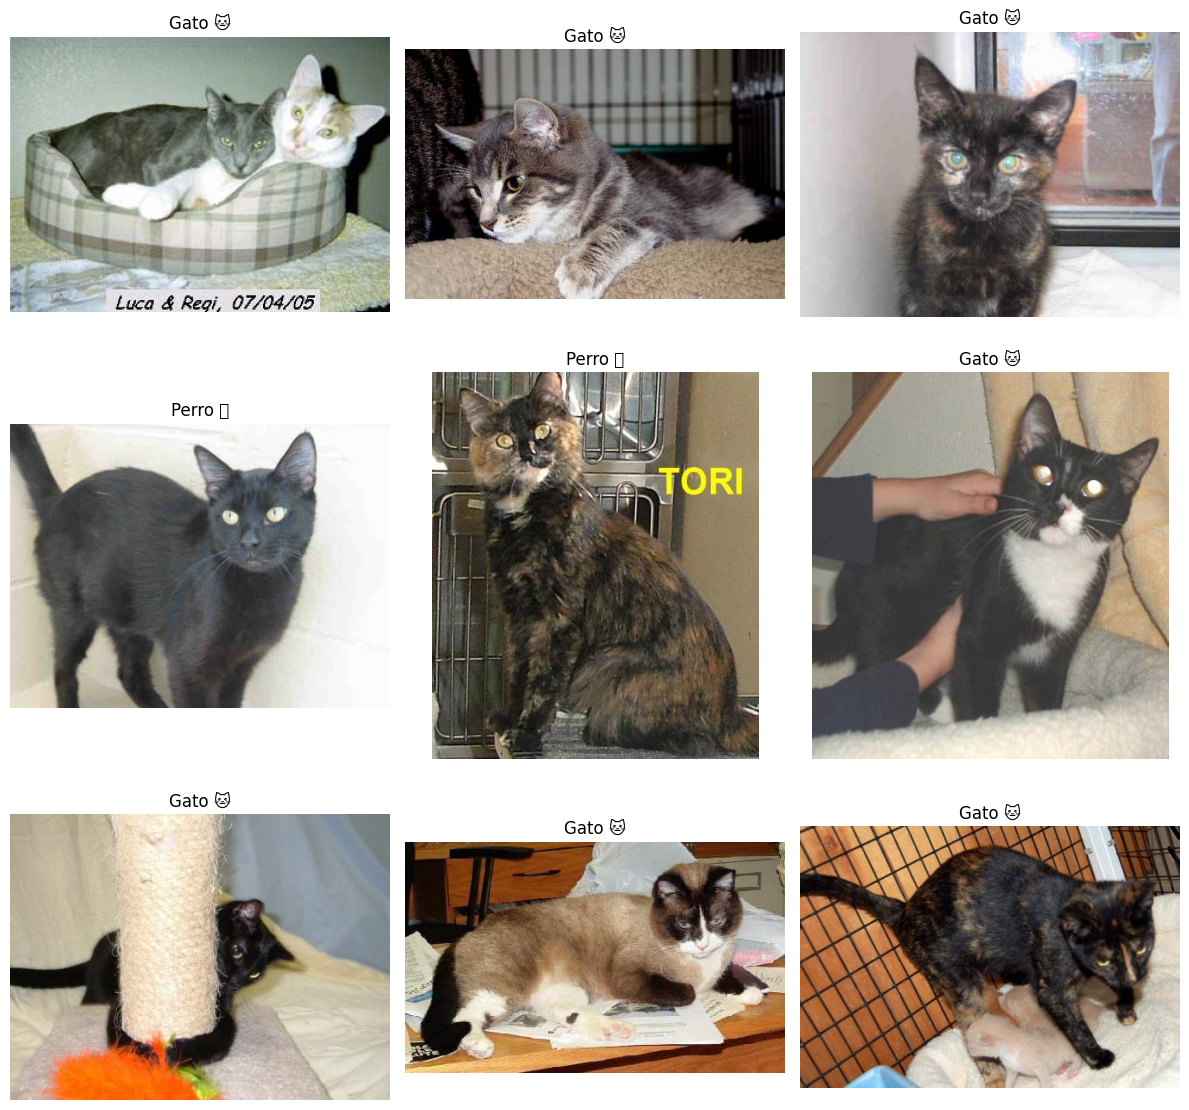

In [18]:
import numpy as np
import matplotlib.image as mpimg

filenames = test_data_gen.filenames
plt.figure(figsize=(12, 12))

for i in range(9):
    img_path = os.path.join(PATH, filenames[i])
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    pred = "Perro 🐶" if predictions[i] > 0.5 else "Gato 🐱"
    plt.title(pred)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
model.save("modelo_gatos_perros.h5")
print("✅ Modelo guardado correctamente.")


✅ Modelo guardado correctamente.
